# Logistic Regression: 
## Predict whether a person makes over 50K per year using the Census Income Data Set

### Train Data Set

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

df = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.data", header=None)
df = df.iloc[0:16281]  #train and test datasets need to be the same size
df.head(8)     # with this command you can see your file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [37]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [38]:
age = df['age']
income = df['income']
print(age.head(1), "\n", income.head(1))

0    39
Name: age, dtype: int64 
 0     <=50K
Name: income, dtype: object


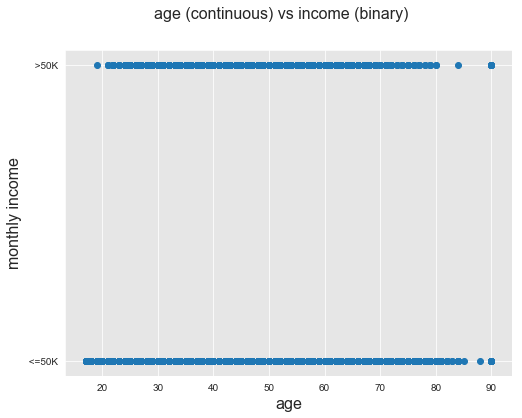

In [39]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age (continuous) vs income (binary)', fontsize=16)
plt.scatter(age, income);
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income", fontsize=16)
plt.show();

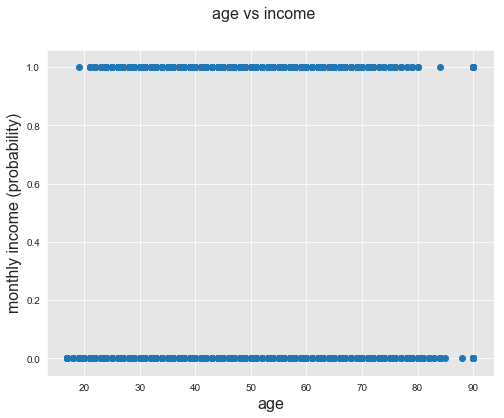

In [40]:
income_bin = income == " >50K"
income_bin = income_bin.astype(int)
income_bin.head()
fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability)", fontsize=16);

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

regr = LogisticRegression(C=1e5, solver='lbfgs')
age = age.values  #turns series object into an array object
age = age.reshape(-1, 1)
model_log = regr.fit(age, income_bin)
print(model_log)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


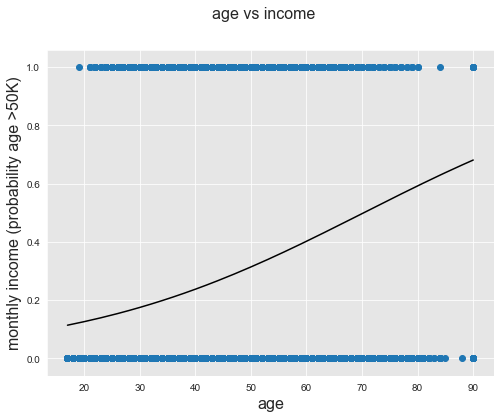

In [42]:
coef = regr.coef_
interc = regr.intercept_

lin_pred = (age * coef + interc)    #linear prefictor
mod_income = 1 / ( 1+ np.exp(-lin_pred))  #log transformation
age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x:x[0]))

fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability age >50K)", fontsize=16);
plt.plot(age_ordered, mod_income_ordered, c="black")
plt.show()

### Test Data Set

In [43]:
df_test = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.test", header=None)

df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

age_test = df_test['age']
print(age_test.head(2))
income_test = df_test['income']
print(income_test.head(2))

income_bin_test = income_test == " >50K."
income_bin_test = income_bin_test.astype(int)

0    25
1    38
Name: age, dtype: int64
0     <=50K.
1     <=50K.
Name: income, dtype: object


In [9]:
age_test = age_test.values  #turns series object into an array object
age_test = age_test.reshape(-1, 1)

In [10]:
#df.shape[0] != df_test.shape[0]

regr_test = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs')
model_log_test = regr_test.fit(age, income_bin)
print(model_log_test)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [11]:
y_hat_test = regr.predict(age_test)

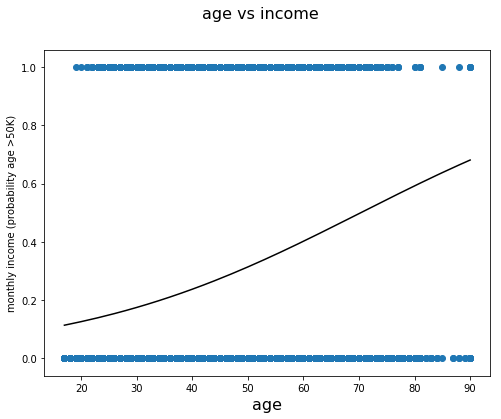

In [12]:
coef = regr.coef_
interc = regr.intercept_

lin_pred = (age * coef + interc)    #linear prefictor
mod_income = 1 / ( 1+ np.exp(-lin_pred))  #log transformation
age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x:x[0]))

fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age_test, income_bin_test)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability age >50K)");
plt.plot(age_ordered, mod_income_ordered, c="black")
plt.show()

### Evaluation of model accuracty with ROC and AUC

In [14]:
from sklearn.metrics import roc_curve, auc
y_score = regr.fit(age, income_bin).decision_function(age_test)

fpr, tpr, thresholds = roc_curve(income_bin_test, y_score)

In [15]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.6783597431553071


AUC: 0.6783597431553071


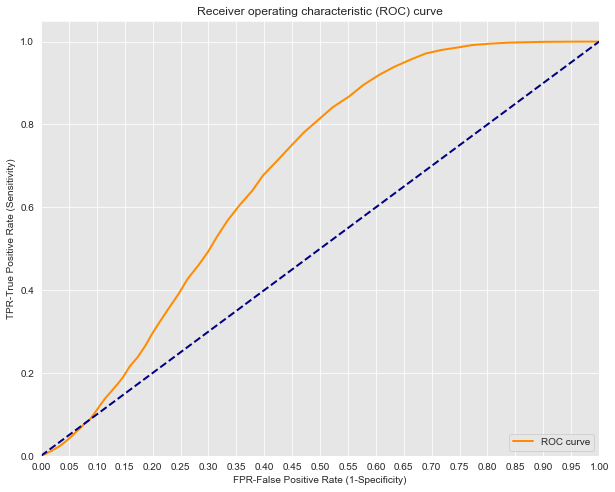

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10,8))
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')   #line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('FPR-False Positive Rate (1-Specificity)') 
plt.ylabel('TPR-True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()